In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# 1. Đọc data
df = pd.read_csv("Du_lieu_nguoi_di_lam_final.csv")

# Tổng quan thông tin về những người được khảo sát

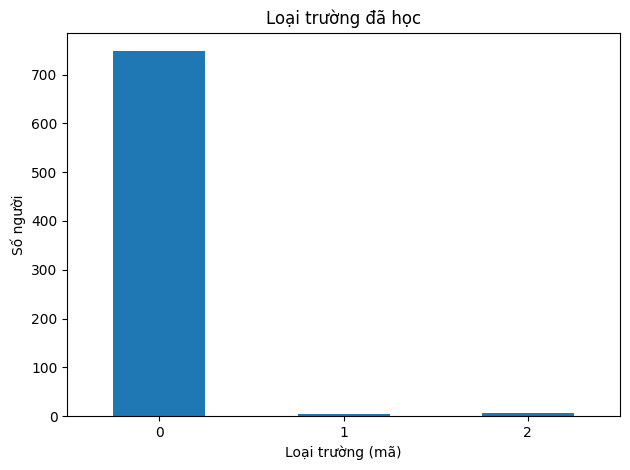

In [46]:
# C. LOẠI TRƯỜNG
plt.figure()
df['p1q2_typeschool'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Loại trường (mã)")
plt.ylabel("Số người")
plt.title("Loại trường đã học")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Hầu hết học trường công lập

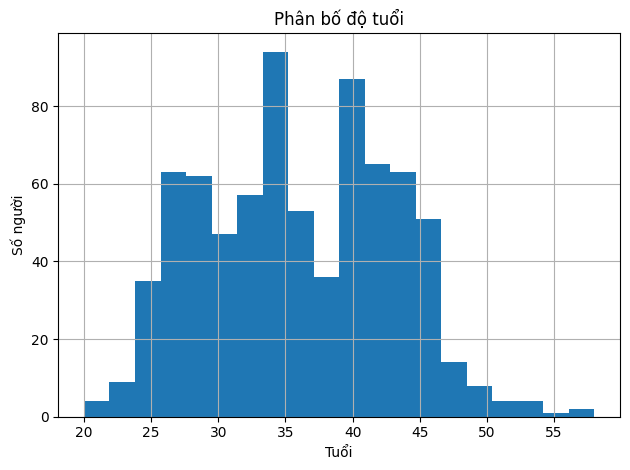

In [47]:
# A. PHÂN BỐ TUỔI
plt.figure()
df['v9'].hist(bins=20)
plt.xlabel("Tuổi")
plt.ylabel("Số người")
plt.title("Phân bố độ tuổi")
plt.tight_layout()
plt.show()

# đối tượng khảo sát là người đi làm từ 20 đến 60 tuổi, tập trung nhiều ở độ tuổi 25-45

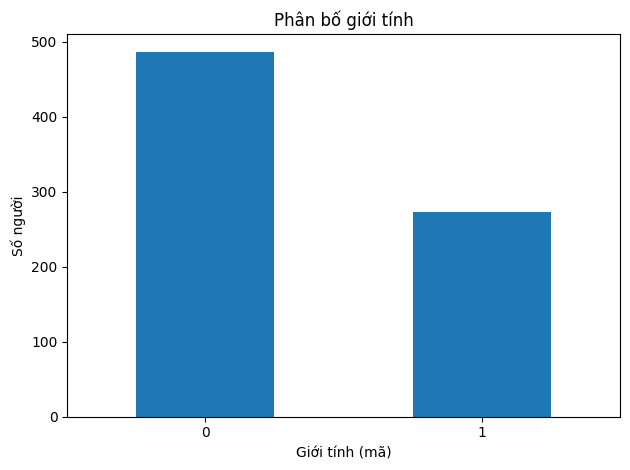

In [48]:
# B. GIỚI TÍNH
plt.figure()
df['p1q5_gender'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Giới tính (mã)")
plt.ylabel("Số người")
plt.title("Phân bố giới tính")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Nam nhiều hơn nữ

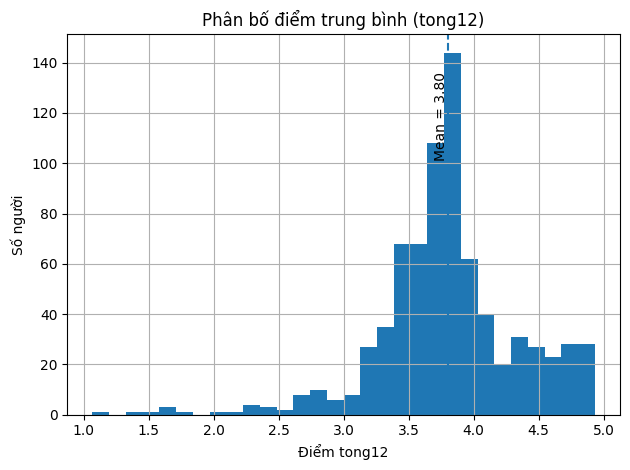

In [49]:
#  ĐIỂM TRUNG BÌNH (tong12)
plt.figure()
df['tong12'].hist(bins=30)
plt.xlabel("Điểm tong12")
plt.ylabel("Số người")
plt.title("Phân bố điểm trung bình (tong12)")

# vẽ thêm đường thẳng thể hiện giá trị trung bình
mean_tong12 = df['tong12'].mean()
plt.axvline(mean_tong12, linestyle='dashed')
plt.text(mean_tong12, plt.ylim()[1]*0.9, f"Mean = {mean_tong12:.2f}", rotation=90,
         va='top', ha='right')
plt.tight_layout()
plt.show()

# Điểm trung bình khoảng 3.8, có một số người có điểm rất thấp 

Text(0.5, 1.0, 'Sau khi học xong THCS, anh/chị làm gì?')

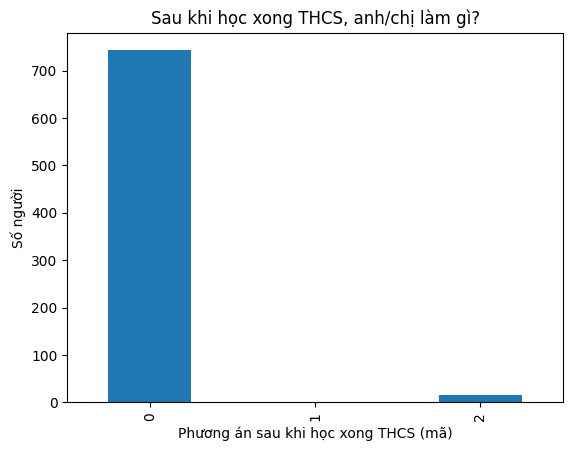

In [50]:
# SAU KHI HỌC XONG THCS THÌ ANH/CHỊ...? (p1q8_afloseschool)
plt.figure()
df['p1q8_afloseschool'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Phương án sau khi học xong THCS (mã)")
plt.ylabel("Số người")
plt.title("Sau khi học xong THCS, anh/chị làm gì?")

# Sau khi học xong THCS thì đa số học tiếp lên THPT, một số ít chọn đi làm 

# Tình trạng việc làm


Text(0.5, 1.0, 'Tình trạng đã từng đổi việc')

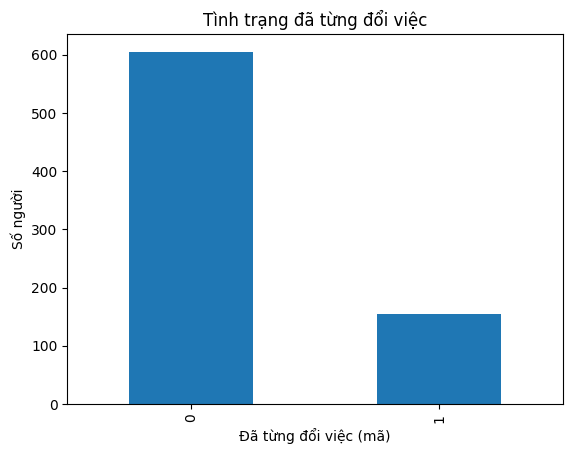

In [51]:
#  ĐÃ TỪNG ĐỔI VIỆC HAY CHƯA (p1q10_chanjob: 0/1)
plt.figure()
df['p1q10_chanjob'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Đã từng đổi việc (mã)")
plt.ylabel("Số người")
plt.title("Tình trạng đã từng đổi việc")

# Số người đã từng đổi việc nhiều hơn số người chưa từng đổi việc. Tình trạng đổi việc khá phổ biến hiện nay.

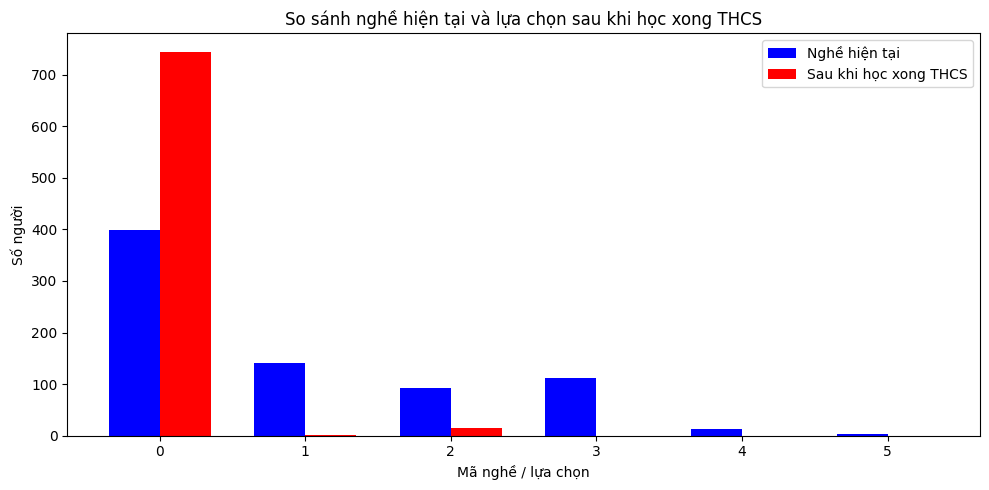

In [52]:
# Đếm tần suất theo mã
current_counts = df["p1q9_job_current"].value_counts().sort_index()
after_counts   = df["p1q8_afloseschool"].value_counts().sort_index()

# Đồng bộ các mã (phòng khi 1 bên thiếu mã nào đó)
all_codes = sorted(set(current_counts.index).union(after_counts.index))
current = current_counts.reindex(all_codes, fill_value=0)
after   = after_counts.reindex(all_codes, fill_value=0)

# Vẽ grouped bar chart
plt.figure(figsize=(10, 5))

bar_width = 0.35
x = range(len(all_codes))

plt.bar(
    [i - bar_width/2 for i in x],
    current,
    width=bar_width,
    color="blue",
    label="Nghề hiện tại",
)
plt.bar(
    [i + bar_width/2 for i in x],
    after,
    width=bar_width,
    color="red",
    label="Sau khi học xong THCS",
)

plt.xticks(list(x), all_codes)
plt.xlabel("Mã nghề / lựa chọn")
plt.ylabel("Số người")
plt.title("So sánh nghề hiện tại và lựa chọn sau khi học xong THCS")
plt.legend()
plt.tight_layout()
plt.show()

# Sau khi học xong THCS, nhiều người chọn nhóm nghành Kĩ thuật, công nghệ. Sau đó đổi nghề, phần bố tương đối hơn giữa các nhóm nghề, nhưng chủ yếu vẫn là nhóm nghành Kĩ thuật, công nghệ.

# Ảnh hưởng đến chọn việc làm 

p1q9_job_current      0     1     2     3    4    5
p1q15_hsub                                         
0                  46.7  29.2   4.8  16.8  2.1  0.3
1                  60.9   9.9  17.9  10.6  0.7  0.0
2                  48.8   6.1  23.2  20.1  1.8  0.0
3                  33.3  35.2  11.1  11.1  7.4  1.9
4                  52.9  29.4   5.9  11.8  0.0  0.0
5                  72.2   5.6  11.1  11.1  0.0  0.0
6                  87.5   0.0  12.5   0.0  0.0  0.0
7                  89.5   0.0   5.3   0.0  0.0  5.3
8                  66.7  33.3   0.0   0.0  0.0  0.0
9                  88.9   0.0  11.1   0.0  0.0  0.0
10                 66.7   0.0   0.0  33.3  0.0  0.0
11                100.0   0.0   0.0   0.0  0.0  0.0
12                100.0   0.0   0.0   0.0  0.0  0.0


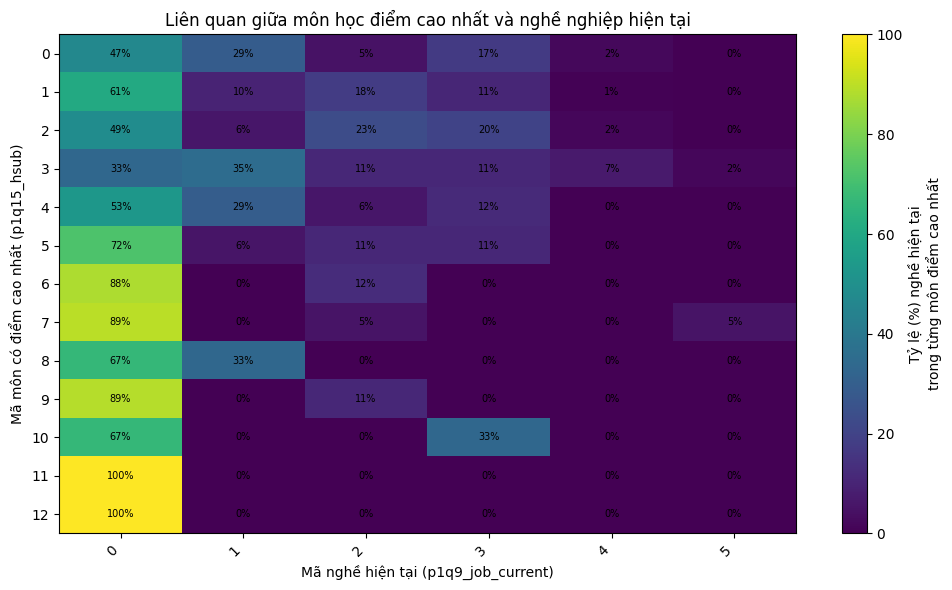

In [53]:
# Bảng chéo: mỗi dòng = 1 môn cao điểm, cột = nghề hiện tại (tính % theo từng môn)
ct = pd.crosstab(df['p1q15_hsub'],
                 df['p1q9_job_current'],
                 normalize='index') * 100

print(ct.round(1))   # xem bảng số
fig, ax = plt.subplots(figsize=(10, 6))

im = ax.imshow(ct.values, aspect='auto')

# Tick & label
ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns, rotation=45, ha='right')

ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)

# Ghi giá trị %
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.values[i, j]
        ax.text(j, i, f"{val:.0f}%", ha='center', va='center', fontsize=7)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Tỷ lệ (%) nghề hiện tại\ntrong từng môn điểm cao nhất")

ax.set_xlabel("Mã nghề hiện tại (p1q9_job_current)")
ax.set_ylabel("Mã môn có điểm cao nhất (p1q15_hsub)")
ax.set_title("Liên quan giữa môn học điểm cao nhất và nghề nghiệp hiện tại")

plt.tight_layout()
plt.show()


p1q9_job_current      0     1     2     3    4    5
p1q16_likesub                                      
0                  79.3  11.4   4.3   3.6  0.7  0.7
1                  69.9   5.6  14.7   9.1  0.0  0.7
2                  41.8  19.2  18.5  18.5  2.1  0.0
3                  25.7  34.5  10.1  27.7  1.4  0.7
4                  30.6  38.8  10.6  12.9  7.1  0.0
5                  52.2  13.0  17.4  17.4  0.0  0.0
6                  50.0   3.6  14.3  25.0  7.1  0.0
7                  88.9   0.0   5.6   5.6  0.0  0.0
8                  50.0  25.0  25.0   0.0  0.0  0.0
9                  81.8   0.0   9.1   9.1  0.0  0.0
10                 25.0   0.0  50.0  25.0  0.0  0.0
11                100.0   0.0   0.0   0.0  0.0  0.0
12                 85.7   0.0  14.3   0.0  0.0  0.0


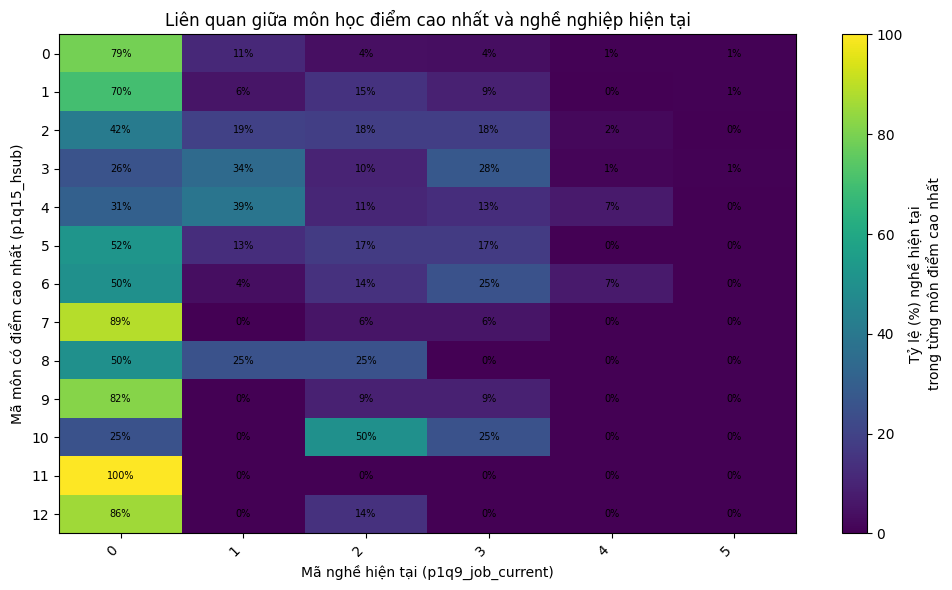

In [54]:
# Bảng chéo: mỗi dòng = 1 môn cao điểm, cột = nghề hiện tại (tính % theo từng môn)
ct = pd.crosstab(df['p1q16_likesub'],
                 df['p1q9_job_current'],
                 normalize='index') * 100

print(ct.round(1))   # xem bảng số
fig, ax = plt.subplots(figsize=(10, 6))

im = ax.imshow(ct.values, aspect='auto')

# Tick & label
ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns, rotation=45, ha='right')

ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)

# Ghi giá trị %
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.values[i, j]
        ax.text(j, i, f"{val:.0f}%", ha='center', va='center', fontsize=7)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Tỷ lệ (%) nghề hiện tại\ntrong từng môn điểm cao nhất")

ax.set_xlabel("Mã nghề hiện tại (p1q9_job_current)")
ax.set_ylabel("Mã môn có điểm cao nhất (p1q15_hsub)")
ax.set_title("Liên quan giữa môn học điểm cao nhất và nghề nghiệp hiện tại")

plt.tight_layout()
plt.show()


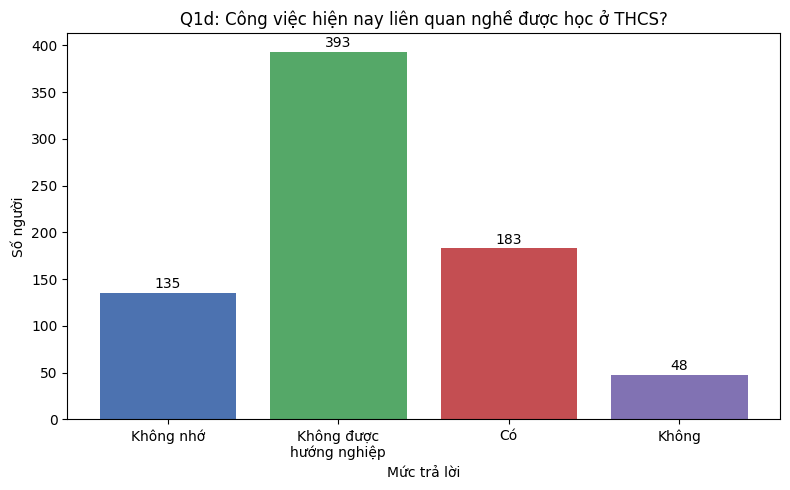

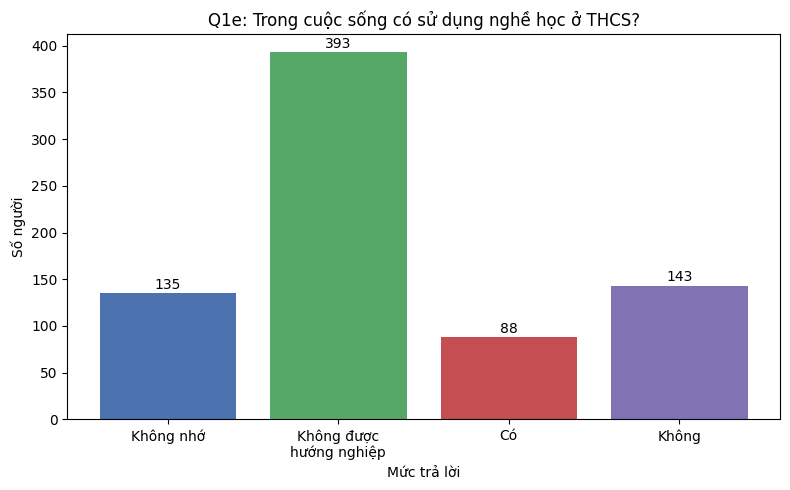

In [55]:
# Mapping ý nghĩa mã
label_map = {
    -1: "Không được\nhướng nghiệp",
    -2: "Không nhớ",
     0: "Có",
     1: "Không"
}

# Danh sách câu hỏi cần trực quan
questions = {
    "q1d_recurjob": "Q1d: Công việc hiện nay liên quan nghề được học ở THCS?",
    "q1e_lifeuse": "Q1e: Trong cuộc sống có sử dụng nghề học ở THCS?"
}

for col, title in questions.items():

    # Lấy tần suất
    counts = df[col].value_counts().sort_index()

    # Đổi mã thành chữ
    counts.index = counts.index.map(label_map)

    # Vẽ bar chart
    plt.figure(figsize=(8,5))
    plt.bar(counts.index, counts.values, color=['#4c72b0','#55a868','#c44e52','#8172b3'])
    
    plt.title(title)
    plt.ylabel("Số người")
    plt.xlabel("Mức trả lời")
    plt.xticks(rotation=0)
    
    # Ghi số lên cột
    for i, v in enumerate(counts.values):
        plt.text(i, v + 5, str(v), ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

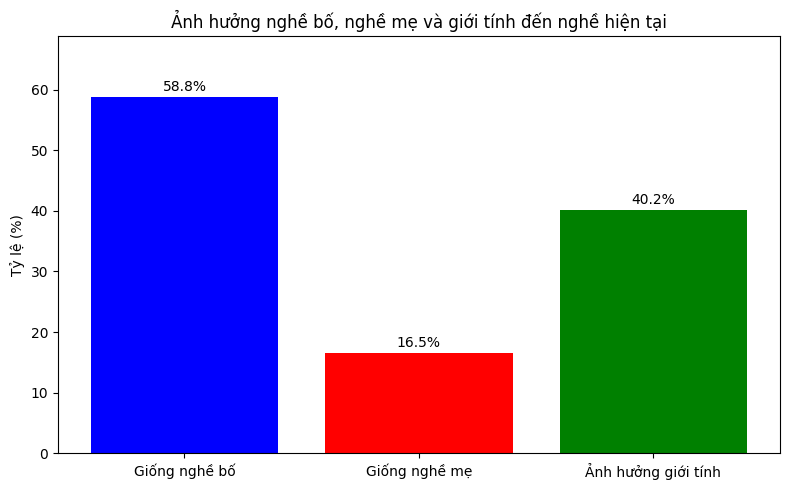

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Du_lieu_nguoi_di_lam_final.csv")

# Tạo biến match nghề bố, mẹ
df['match_father'] = (df['p1q9_job_current'] == df['p1q11_mostsuc']).astype(int)
df['match_mother'] = (df['p1q9_job_current'] == df['p1q12_fjob']).astype(int)

# Tính theo % toàn bộ mẫu
pct_father = df['match_father'].mean() * 100
pct_mother = df['match_mother'].mean() * 100

# Tính theo giới tính
gender_match = df.groupby('p1q5_gender')[['match_father', 'match_mother']].mean() * 100
gender_match
plt.figure(figsize=(8,5))

values = [
    pct_father,
    pct_mother,
    gender_match['match_father'].loc[0] - gender_match['match_mother'].loc[1]  # mức ảnh hưởng theo giới tính
]

labels = ['Giống nghề bố', 'Giống nghề mẹ', 'Ảnh hưởng giới tính']

colors = ['blue', 'red', 'green']

plt.bar(labels, values, color=colors)

plt.ylabel("Tỷ lệ (%)")
plt.title("Ảnh hưởng nghề bố, nghề mẹ và giới tính đến nghề hiện tại")

for i,v in enumerate(values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.ylim(0, max(values)+10)
plt.tight_layout()
plt.show()



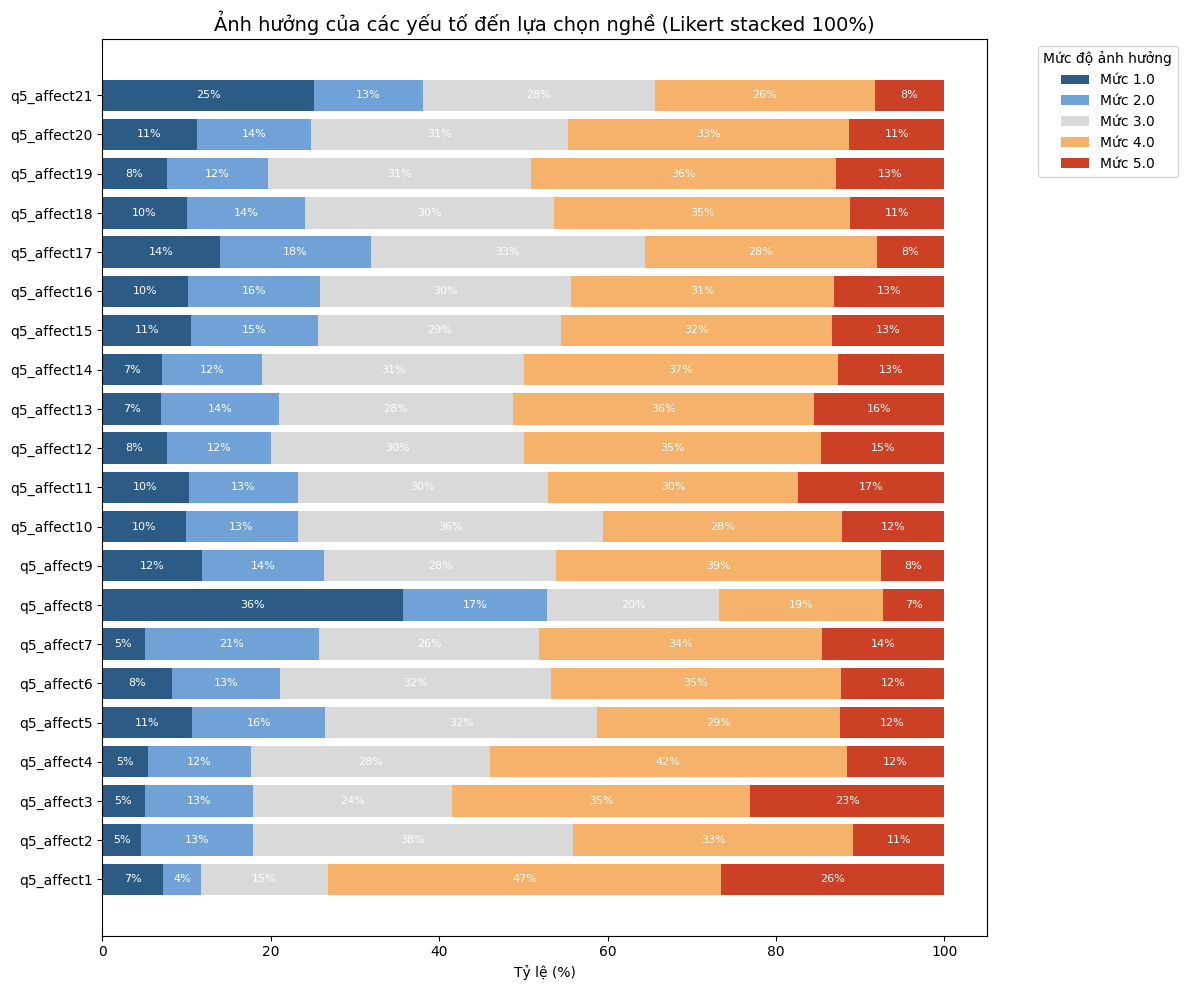

In [57]:
# Các cột effect
effect_cols = [f"q5_affect{i}" for i in range(1, 22)]

# Tạo bảng đếm % từng mức cho mỗi câu
likert = df[effect_cols].apply(lambda x: x.value_counts(normalize=True) * 100).T

# Đảm bảo các mức 1→5 đều có (tránh lỗi thiếu cột)
for i in range(1, 6):
    if i not in likert.columns:
        likert[i] = 0

# Sắp xếp mức theo 1→5
likert = likert[[1, 2, 3, 4, 5]]

# Màu (có thể đổi)
colors = [
    "#2c5c85",   # Mức 1 (rất ảnh hưởng)
    "#70a1d7",   # Mức 2
    "#d9d9d9",   # Mức 3 (trung lập)
    "#f6b26b",   # Mức 4
    "#cc4125"    # Mức 5 (không ảnh hưởng)
]

# Vẽ
fig, ax = plt.subplots(figsize=(12, 10))

left = np.zeros(len(likert))

for i, level in enumerate(likert.columns):
    ax.barh(likert.index, likert[level], left=left, color=colors[i], label=f"Mức {level}")
    
    # Ghi % lên từng đoạn
    for y, (value, l) in enumerate(zip(likert[level], left)):
        if value > 3:   # chỉ ghi nếu đủ rộng
            ax.text(l + value/2, y, f"{value:.0f}%", ha='center', va='center', color="white", fontsize=8)
            
    left += likert[level]

ax.set_xlabel("Tỷ lệ (%)")
ax.set_title("Ảnh hưởng của các yếu tố đến lựa chọn nghề (Likert stacked 100%)", fontsize=14)

plt.legend(title="Mức độ ảnh hưởng", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

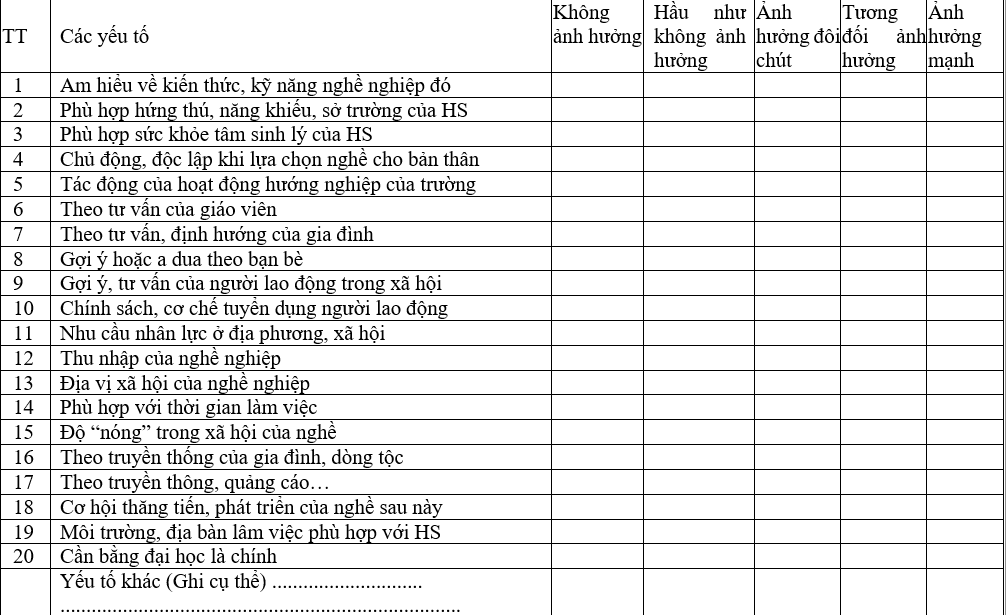

Am hiểu về kiến thức, kỹ năng nghề nghiệp : hơn 70% đánh giá có ảnh hưởng và ảnh hưởng mạnh

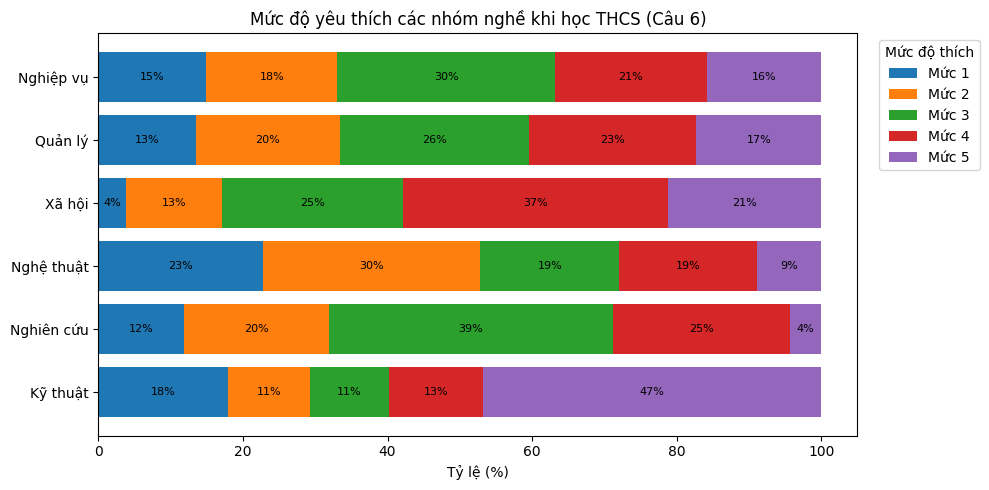

In [58]:


like_cols = {
    "q6_likeen":  "Kỹ thuật",
    "q6_likere":  "Nghiên cứu",
    "q6_likear":  "Nghệ thuật",
    "q6_likeso":  "Xã hội",
    "q6_likeman": "Quản lý",
    "q6_likecle": "Nghiệp vụ",
}

# Tạo bảng % cho từng mức 1..5
rows = {}
for col, label in like_cols.items():
    counts = (
        df[col]
        .value_counts(normalize=True)
        .reindex([1, 2, 3, 4, 5], fill_value=0) * 100
    )
    rows[label] = counts

like_pct = pd.DataFrame(rows).T  # hàng = nhóm nghề, cột = mức 1..5
like_pct.columns = [1, 2, 3, 4, 5]

# Vẽ stacked bar nằm ngang
fig, ax = plt.subplots(figsize=(10, 5))

left = 0
for level in [1, 2, 3, 4, 5]:
    ax.barh(
        like_pct.index,
        like_pct[level],
        left=left,
        label=f"Mức {level}"
    )
    left += like_pct[level]

# Thêm % lên thanh (optional)
for i, group in enumerate(like_pct.index):
    cum_left = 0
    for level in [1, 2, 3, 4, 5]:
        val = like_pct.loc[group, level]
        if val > 2:  # chỉ ghi nếu % đủ lớn
            ax.text(
                cum_left + val / 2,
                i,
                f"{val:.0f}%",
                ha="center",
                va="center",
                fontsize=8,
            )
        cum_left += val

ax.set_xlabel("Tỷ lệ (%)")
ax.set_title("Mức độ yêu thích các nhóm nghề khi học THCS (Câu 6)")
ax.legend(title="Mức độ thích", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


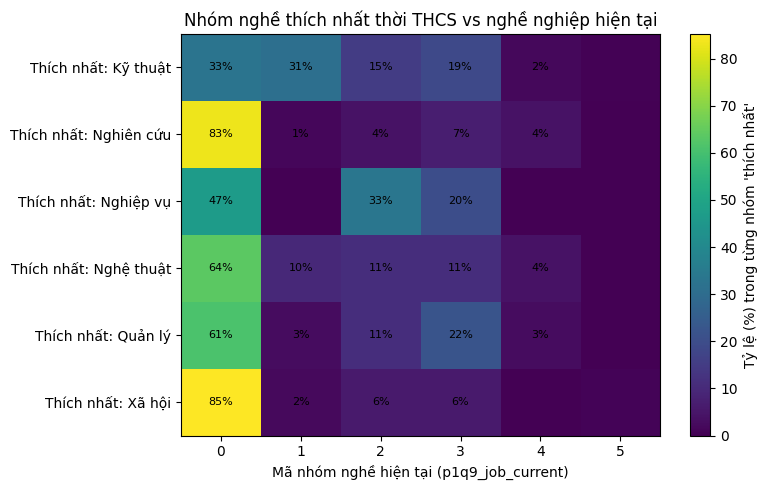

In [ ]:


like_cols_list = ["q6_likeen", "q6_likere", "q6_likear",
                  "q6_likeso", "q6_likeman", "q6_likecle"]

group_names = {
    "q6_likeen":  "Thích nhất: Kỹ thuật",
    "q6_likere":  "Thích nhất: Nghiên cứu",
    "q6_likear":  "Thích nhất: Nghệ thuật",
    "q6_likeso":  "Thích nhất: Xã hội",
    "q6_likeman": "Thích nhất: Quản lý",
    "q6_likecle": "Thích nhất: Nghiệp vụ",
}

# 1) Tìm cột có điểm cao nhất (nếu nhiều cột bằng nhau, idxmax lấy cái đầu)
best_like_col = df[like_cols_list].idxmax(axis=1)
best_like_label = best_like_col.map(group_names)

# 2) Crosstab với nghề hiện tại (mã p1q9_job_current)
ct = pd.crosstab(best_like_label, df["p1q9_job_current"], normalize="index") * 100 # tính xác suất có điều kiện ( thích Y làm nghề X bao nhiêu phần trăm)

# 3) Vẽ heatmap đơn giản
fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(ct.values, aspect="auto")

ax.set_yticks(range(len(ct.index)))
ax.set_yticklabels(ct.index)

ax.set_xticks(range(len(ct.columns)))
ax.set_xticklabels(ct.columns)

for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        val = ct.values[i, j]
        if val > 1:
            ax.text(j, i, f"{val:.0f}%", ha="center", va="center", fontsize=8)

ax.set_xlabel("Mã nhóm nghề hiện tại (p1q9_job_current)")
ax.set_title("Nhóm nghề thích nhất thời THCS vs nghề nghiệp hiện tại")
plt.colorbar(im, label="Tỷ lệ (%) trong từng nhóm 'thích nhất'")
plt.tight_layout()
plt.show()


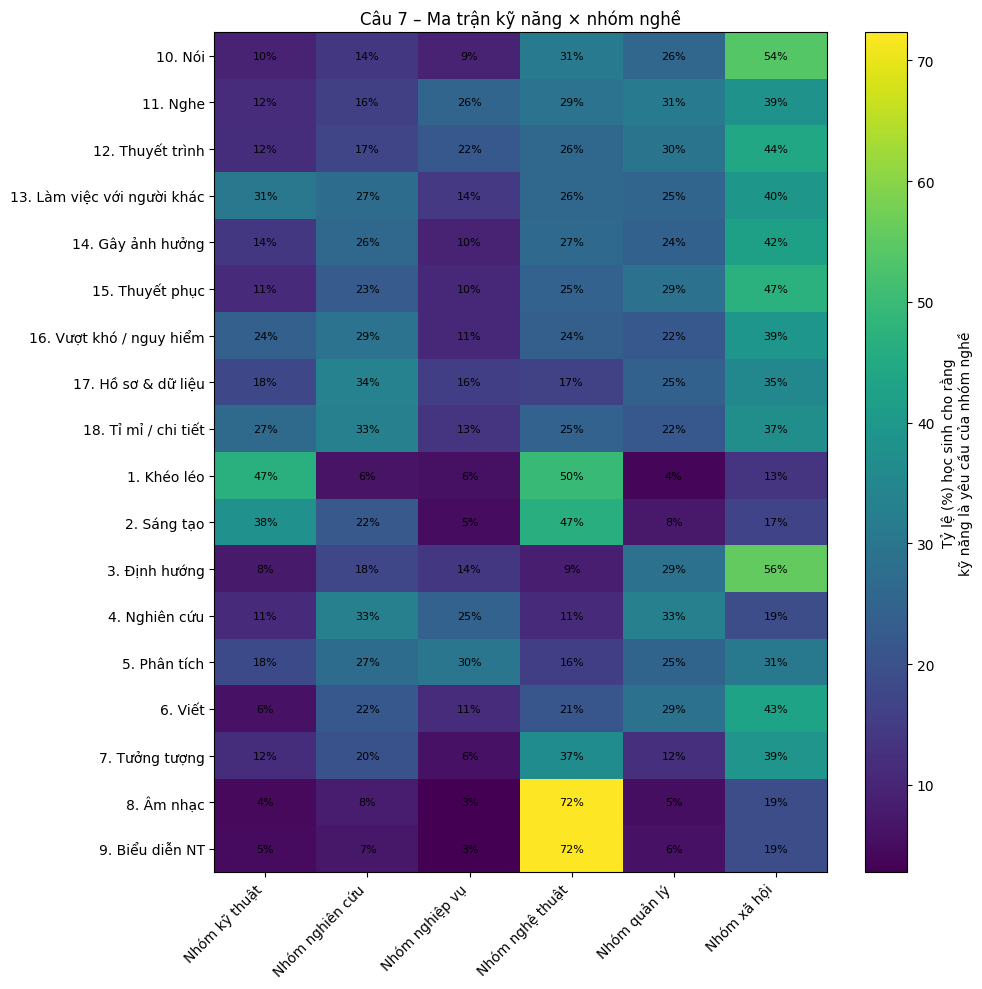

In [60]:
# 2. Lấy các cột requi (Câu 7 đã chuẩn hoá 0/1)
requi_cols = [c for c in df.columns if c.startswith("requi")]

# 3. Map mã nhóm nghề → tên tiếng Việt
group_map = {
    "kt": "Nhóm kỹ thuật",
    "nc": "Nhóm nghiên cứu",
    "nt": "Nhóm nghệ thuật",
    "xh": "Nhóm xã hội",
    "ql": "Nhóm quản lý",
    "nv": "Nhóm nghiệp vụ",
}

# 4. (optional) map tên kỹ năng cho đẹp
skill_label_map = {
    "requi1_kheo_leo": "1. Khéo léo",
    "requi2_sang_tao": "2. Sáng tạo",
    "requi3_dinh_huong": "3. Định hướng",
    "requi4_nghien_cuu": "4. Nghiên cứu",
    "requi5_phan_tich": "5. Phân tích",
    "requi6_viet": "6. Viết",
    "requi7_tuong_tuong": "7. Tưởng tượng",
    "requi8_am_nhac": "8. Âm nhạc",
    "requi9_bieu_dien_nghe_thuat": "9. Biểu diễn NT",
    "requi10_noi": "10. Nói",
    "requi11_nghe": "11. Nghe",
    "requi12_thuyet_trinh": "12. Thuyết trình",
    "requi13_lam_viec_voi_nguoi_khac": "13. Làm việc với người khác",
    "requi14_gay_anh_huong": "14. Gây ảnh hưởng",
    "requi15_thuyet_phuc": "15. Thuyết phục",
    "requi16_vuot_kho_khan_nguy_hiem": "16. Vượt khó / nguy hiểm",
    "requi17_lam_viec_voi_ho_so_du_lieu": "17. Hồ sơ & dữ liệu",
    "requi18_lam_viec_ti_mi_chi_tiet": "18. Tỉ mỉ / chi tiết",
}

# 5. Tính % cho từng (kỹ năng, nhóm nghề)
rows = []
for col in requi_cols:
    parts = col.split("_")
    group_code = parts[-1]                 # kt / nc / nt / xh / ql / nv
    skill_key = "_".join(parts[:-1])       # requi1_kheo_leo

    group_name = group_map.get(group_code, group_code)
    pct = df[col].mean() * 100             # % người tick = mean * 100

    rows.append([skill_key, group_name, pct])

heat_df = pd.DataFrame(rows, columns=["skill_key", "group_name", "pct"])

# 6. Pivot: hàng = kỹ năng, cột = nhóm nghề
heat_table = heat_df.pivot(
    index="skill_key",
    columns="group_name",
    values="pct"
).sort_index()

# Đổi tên hàng bằng label dễ đọc
heat_table.index = [skill_label_map.get(k, k) for k in heat_table.index]

# 7. Vẽ heatmap
fig, ax = plt.subplots(figsize=(10, 10))

im = ax.imshow(heat_table.values, aspect="auto")  # không set cmap → dùng mặc định

# tick & label
ax.set_xticks(range(len(heat_table.columns)))
ax.set_xticklabels(heat_table.columns, rotation=45, ha="right")

ax.set_yticks(range(len(heat_table.index)))
ax.set_yticklabels(heat_table.index)

# ghi % lên từng ô cho dễ đọc
for i in range(heat_table.shape[0]):
    for j in range(heat_table.shape[1]):
        val = heat_table.values[i, j]
        ax.text(j, i, f"{val:.0f}%", ha="center", va="center", fontsize=8)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Tỷ lệ (%) học sinh cho rằng\nkỹ năng là yêu cầu của nhóm nghề")

ax.set_title("Câu 7 – Ma trận kỹ năng × nhóm nghề")
plt.tight_layout()
plt.show()

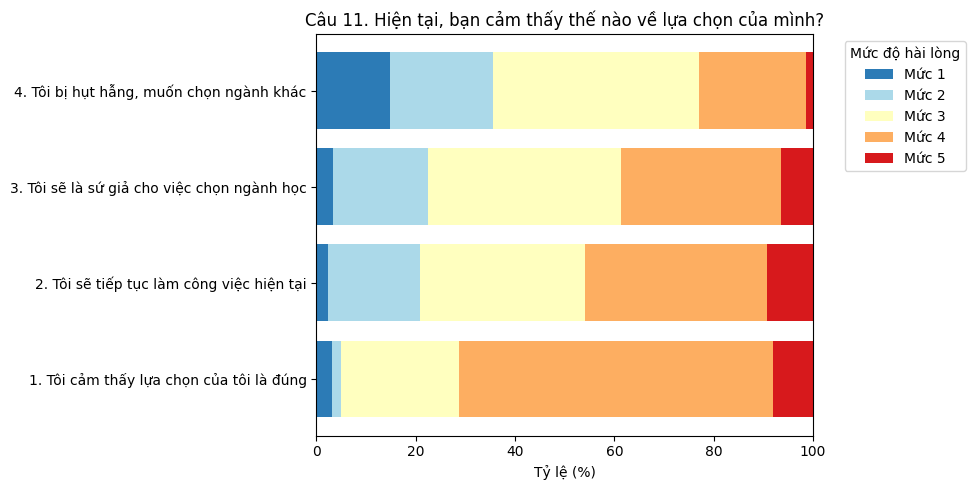

In [63]:
likert_cols = ['q11_curfeel1', 'q11_curfeel2', 'q11_curfeel3', 'q11_curfeel4']

# Đặt nhãn rõ nghĩa theo đúng câu hỏi
labels = [
    "1. Tôi cảm thấy lựa chọn của tôi là đúng",
    "2. Tôi sẽ tiếp tục làm công việc hiện tại",
    "3. Tôi sẽ là sứ giả cho việc chọn ngành học",
    "4. Tôi bị hụt hẫng, muốn chọn ngành khác"
]

# Thứ tự mức độ Likert
likert_order = [1, 2, 3, 4, 5]

# Tính % cho từng mức độ
rows = []
for col in likert_cols:
    perc = (
        df[col]
        .value_counts(normalize=True)
        .reindex(likert_order, fill_value=0) * 100
    )
    rows.append(perc.values)

likert_df = pd.DataFrame(rows, index=labels, columns=likert_order)

# Vẽ stacked bar 100%
fig, ax = plt.subplots(figsize=(10, 5))

left = np.zeros(len(labels))

colors = ["#2c7bb6", "#abd9e9", "#ffffbf", "#fdae61", "#d7191c"]  # xanh→đỏ theo mức độ

for i, val in enumerate(likert_order):
    ax.barh(labels, likert_df[val], left=left, label=f"Mức {val}", color=colors[i])
    left += likert_df[val].values

ax.set_xlabel("Tỷ lệ (%)")
ax.set_xlim(0, 100)
ax.set_title("Câu 11. Hiện tại, bạn cảm thấy thế nào về lựa chọn của mình?")

# legend
ax.legend(title="Mức độ hài lòng", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()